## CONFUSION MATRIX

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


/Users/liyueting/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/liyueting/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Preprocessing
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaperlessBilling', 'PaymentMethod'], drop_first=True)


In [3]:

# Handling missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [4]:
# Define features and target variable
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Make predictions
y_pred = model.predict(X_test)

Accuracy: 0.7920511000709723
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



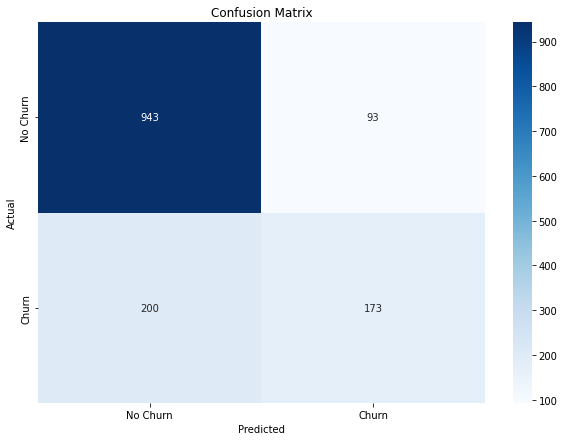

In [8]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## DECISION TREE 

Accuracy: 0.7083037615330021
Confusion Matrix:
[[829 207]
 [204 169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1036
           1       0.45      0.45      0.45       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409



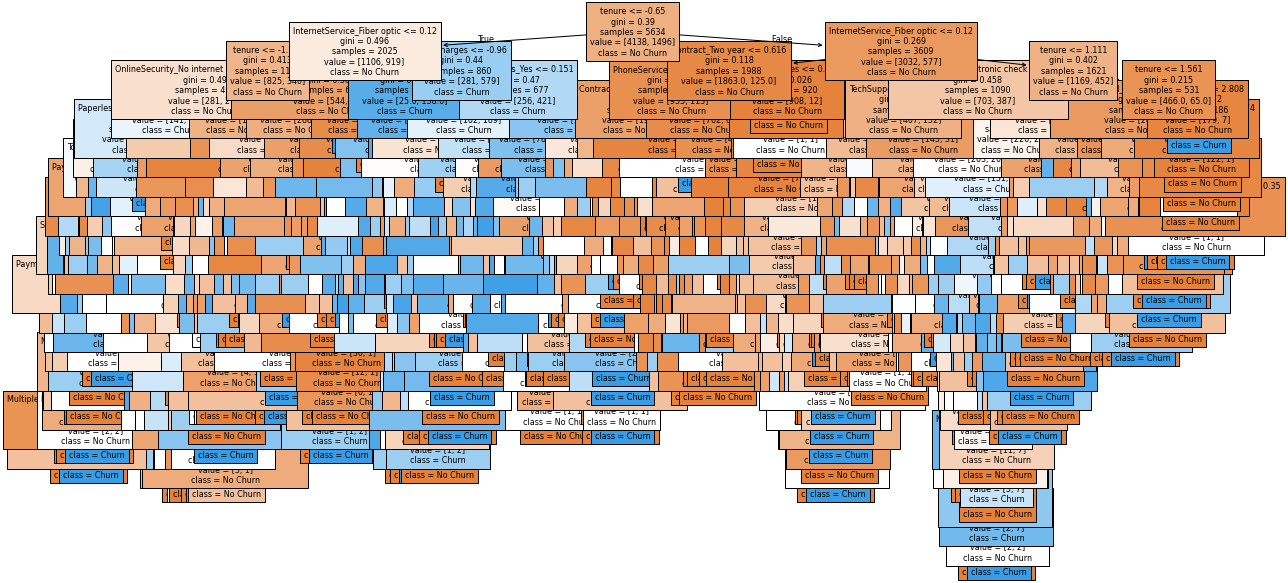

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

# Define features and target variable (adjust columns as necessary)
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, fontsize=8)

# Save the plot to a specific directory
plt.savefig('C:decision_tree_visualization.png', dpi=300, bbox_inches='tight')

plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [12]:
# Define features and target variable (adjust columns as necessary)
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7756743965925225
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.61      0.48      0.54       574

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.76      0.78      0.77      2113



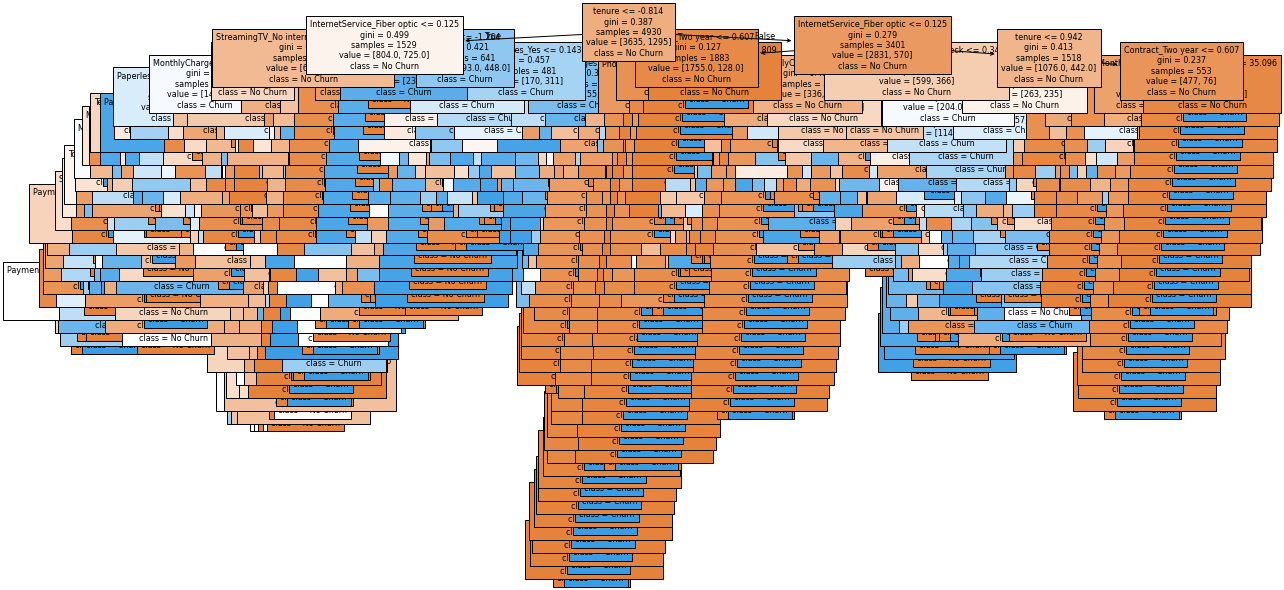

In [15]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, fontsize=8)

# Save the plot to a specific directory
plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')

plt.show()


## LOGISTIC REGRESSION

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop rows where 'children' is null
drop_index = df[df['TotalCharges'].isnull()].index
df.drop(drop_index, inplace=True)

# Drop 'customerID' and 'TotalCharges' columns
df.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)

# Convert 'agent' and 'company' to categorical
df['gender'] = df['gender'].astype('category')
df['Partner'] = df['Partner'].astype('category')

# List of categorical variables
categorical_variables = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                         'MultipleLines', 'InternetService', 'OnlineSecurity', 
                         'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                         'StreamingTV', 'StreamingMovies', 'Contract', 
                         'PaperlessBilling', 'PaymentMethod']

# Create dummy variables for categorical features
df_dummies = pd.get_dummies(df[categorical_variables], drop_first=True)

# Drop the original categorical columns
df.drop(categorical_variables, axis=1, inplace=True)

# Join the dummy variables to the dataframe
df = df.join(df_dummies)

display(df.shape, df.head())

(7043, 30)

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,No,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,No,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,Yes,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,No,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,Yes,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')



In [20]:
# Preprocessing
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Handling missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())



In [21]:
# Define features and target variable
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [23]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8204400283889283
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



Axes(0.125,0.125;0.775x0.755)


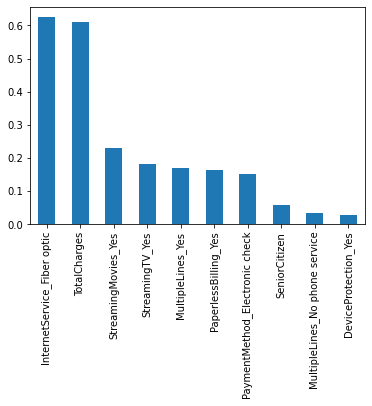

In [24]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.125;0.775x0.755)


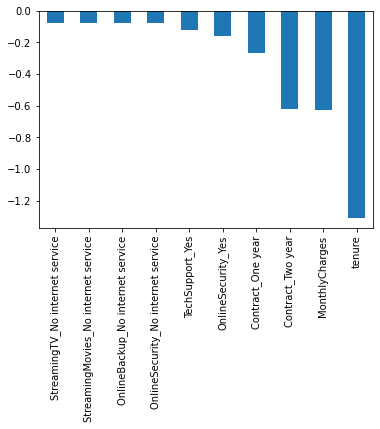

In [25]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Accuracy: 0.7842441447835344
Classification Report:
               precision    recall  f1-score   support

    No Churn       0.83      0.88      0.86      1036
       Churn       0.61      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

Axes(0.125,0.125;0.775x0.755)


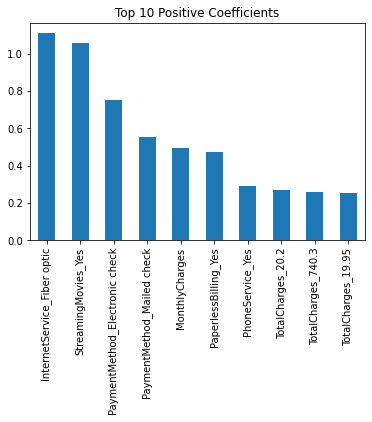

Axes(0.125,0.125;0.775x0.755)


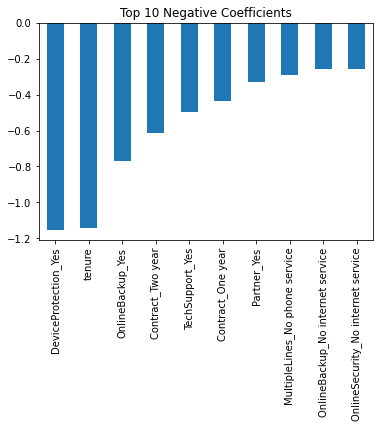

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Define features and target variable (adjust columns as necessary)
X = df.drop(columns=['customerID', 'Churn'])  # Adjust according to your dataset
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print("Classification Report:\n", report)

# Feature importances (coefficients)
weights = pd.Series(logreg.coef_[0], index=X.columns)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 Positive Coefficients'))
plt.show()

print(weights.sort_values(ascending=True)[:10].plot(kind='bar', title='Top 10 Negative Coefficients'))
plt.show()

